# Temperature Forecast Project using ML

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [24]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [25]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [26]:
df.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [27]:
df.sample()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
4547,23.0,26-08-2015,25.3,19.9,43.792828,94.093048,27.397265,21.252824,6.711385,62.11391,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4599.294922,30.9,22.0


In [28]:
df.shape

(7752, 25)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [30]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [31]:
df.duplicated().sum()

0

as missing values are very less , we will drop them

In [32]:
df.dropna(inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Date              7588 non-null   object 
 2   Present_Tmax      7588 non-null   float64
 3   Present_Tmin      7588 non-null   float64
 4   LDAPS_RHmin       7588 non-null   float64
 5   LDAPS_RHmax       7588 non-null   float64
 6   LDAPS_Tmax_lapse  7588 non-null   float64
 7   LDAPS_Tmin_lapse  7588 non-null   float64
 8   LDAPS_WS          7588 non-null   float64
 9   LDAPS_LH          7588 non-null   float64
 10  LDAPS_CC1         7588 non-null   float64
 11  LDAPS_CC2         7588 non-null   float64
 12  LDAPS_CC3         7588 non-null   float64
 13  LDAPS_CC4         7588 non-null   float64
 14  LDAPS_PPT1        7588 non-null   float64
 15  LDAPS_PPT2        7588 non-null   float64
 16  LDAPS_PPT3        7588 non-null   float64


In [34]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [35]:
df.drop(['Date'], axis=1, inplace=True)

In [36]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


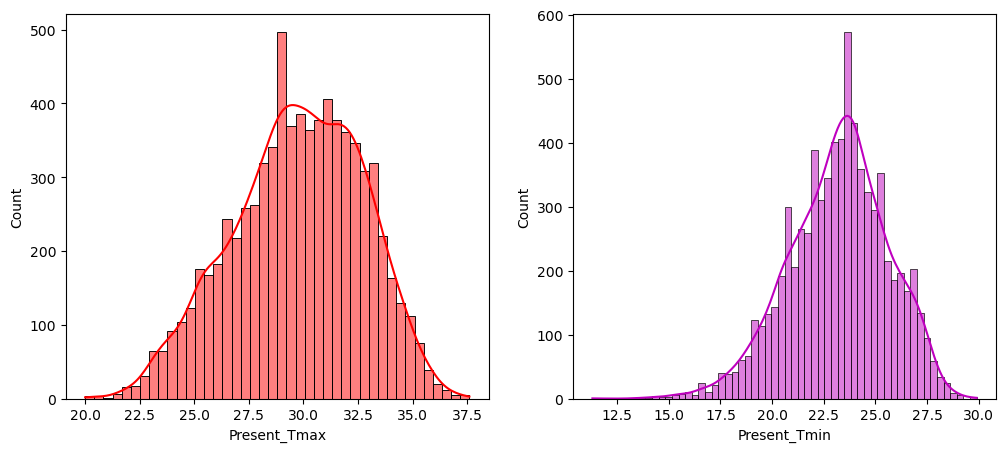

In [37]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Present_Tmax'],kde=True,color='r')
plt.subplot(1,2,2)
sns.histplot(df['Present_Tmin'],kde=True,color='m')
plt.show()

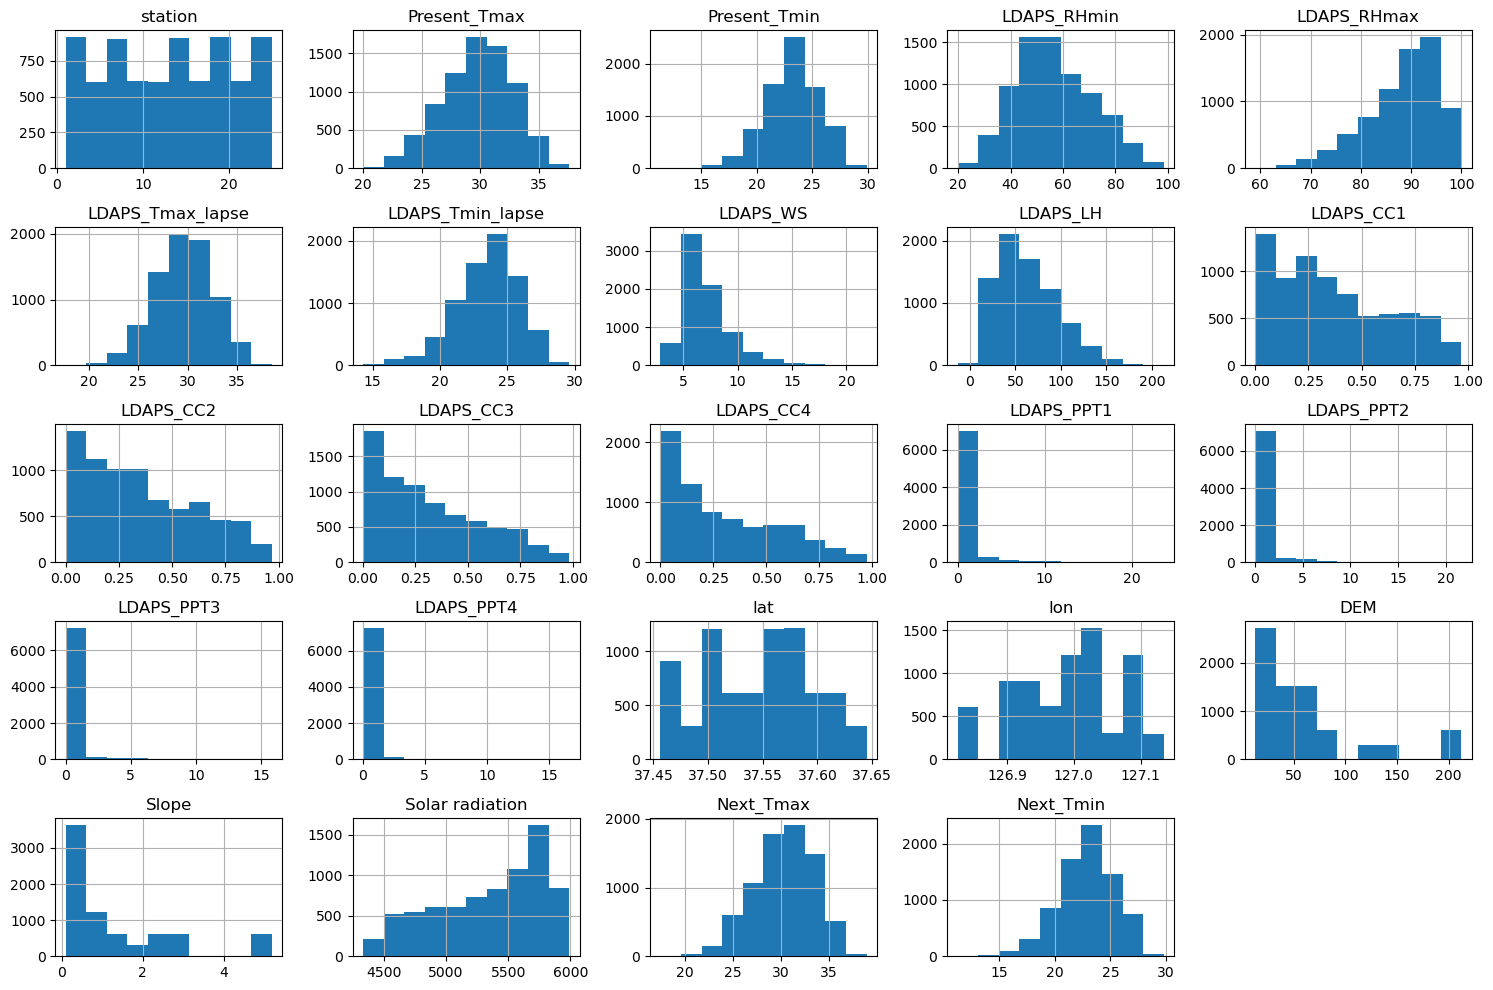

In [38]:
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

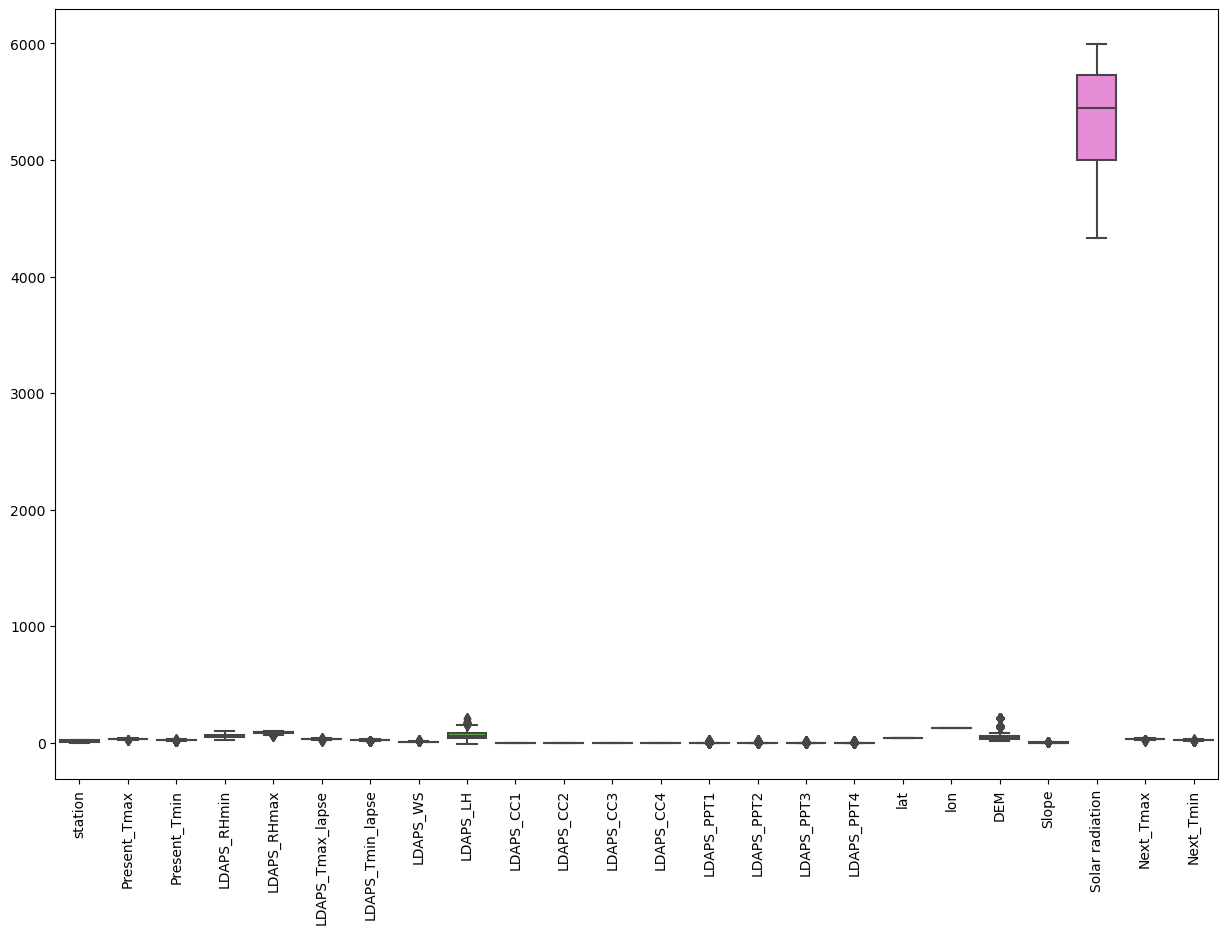

In [39]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

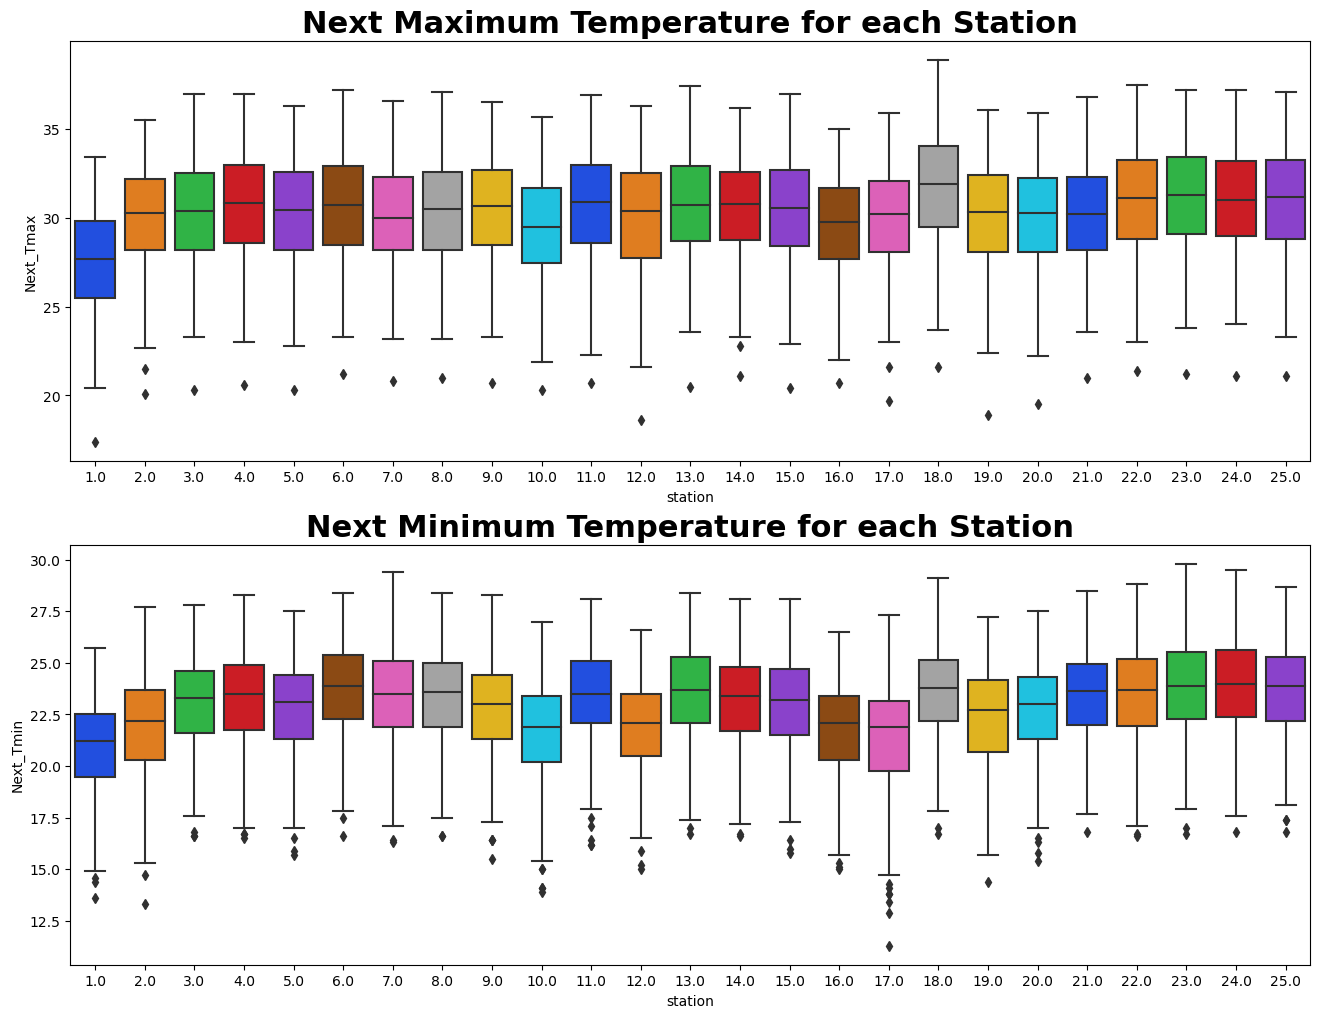

In [40]:
# Visualizing the realtion between station and target variables
plt.figure(figsize=(16,12))
plt.subplot(2,1,1)
sns.boxplot(x=df['station'], y=df['Next_Tmax'], palette="bright")
plt.title('Next Maximum Temperature for each Station', fontsize=22, fontweight='bold')
plt.subplot(2,1,2)
sns.boxplot(x=df['station'], y=df['Next_Tmin'], palette="bright")
plt.title('Next Minimum Temperature for each Station', fontsize=22, fontweight='bold')
plt.show()


# Outliers Detection and Removal

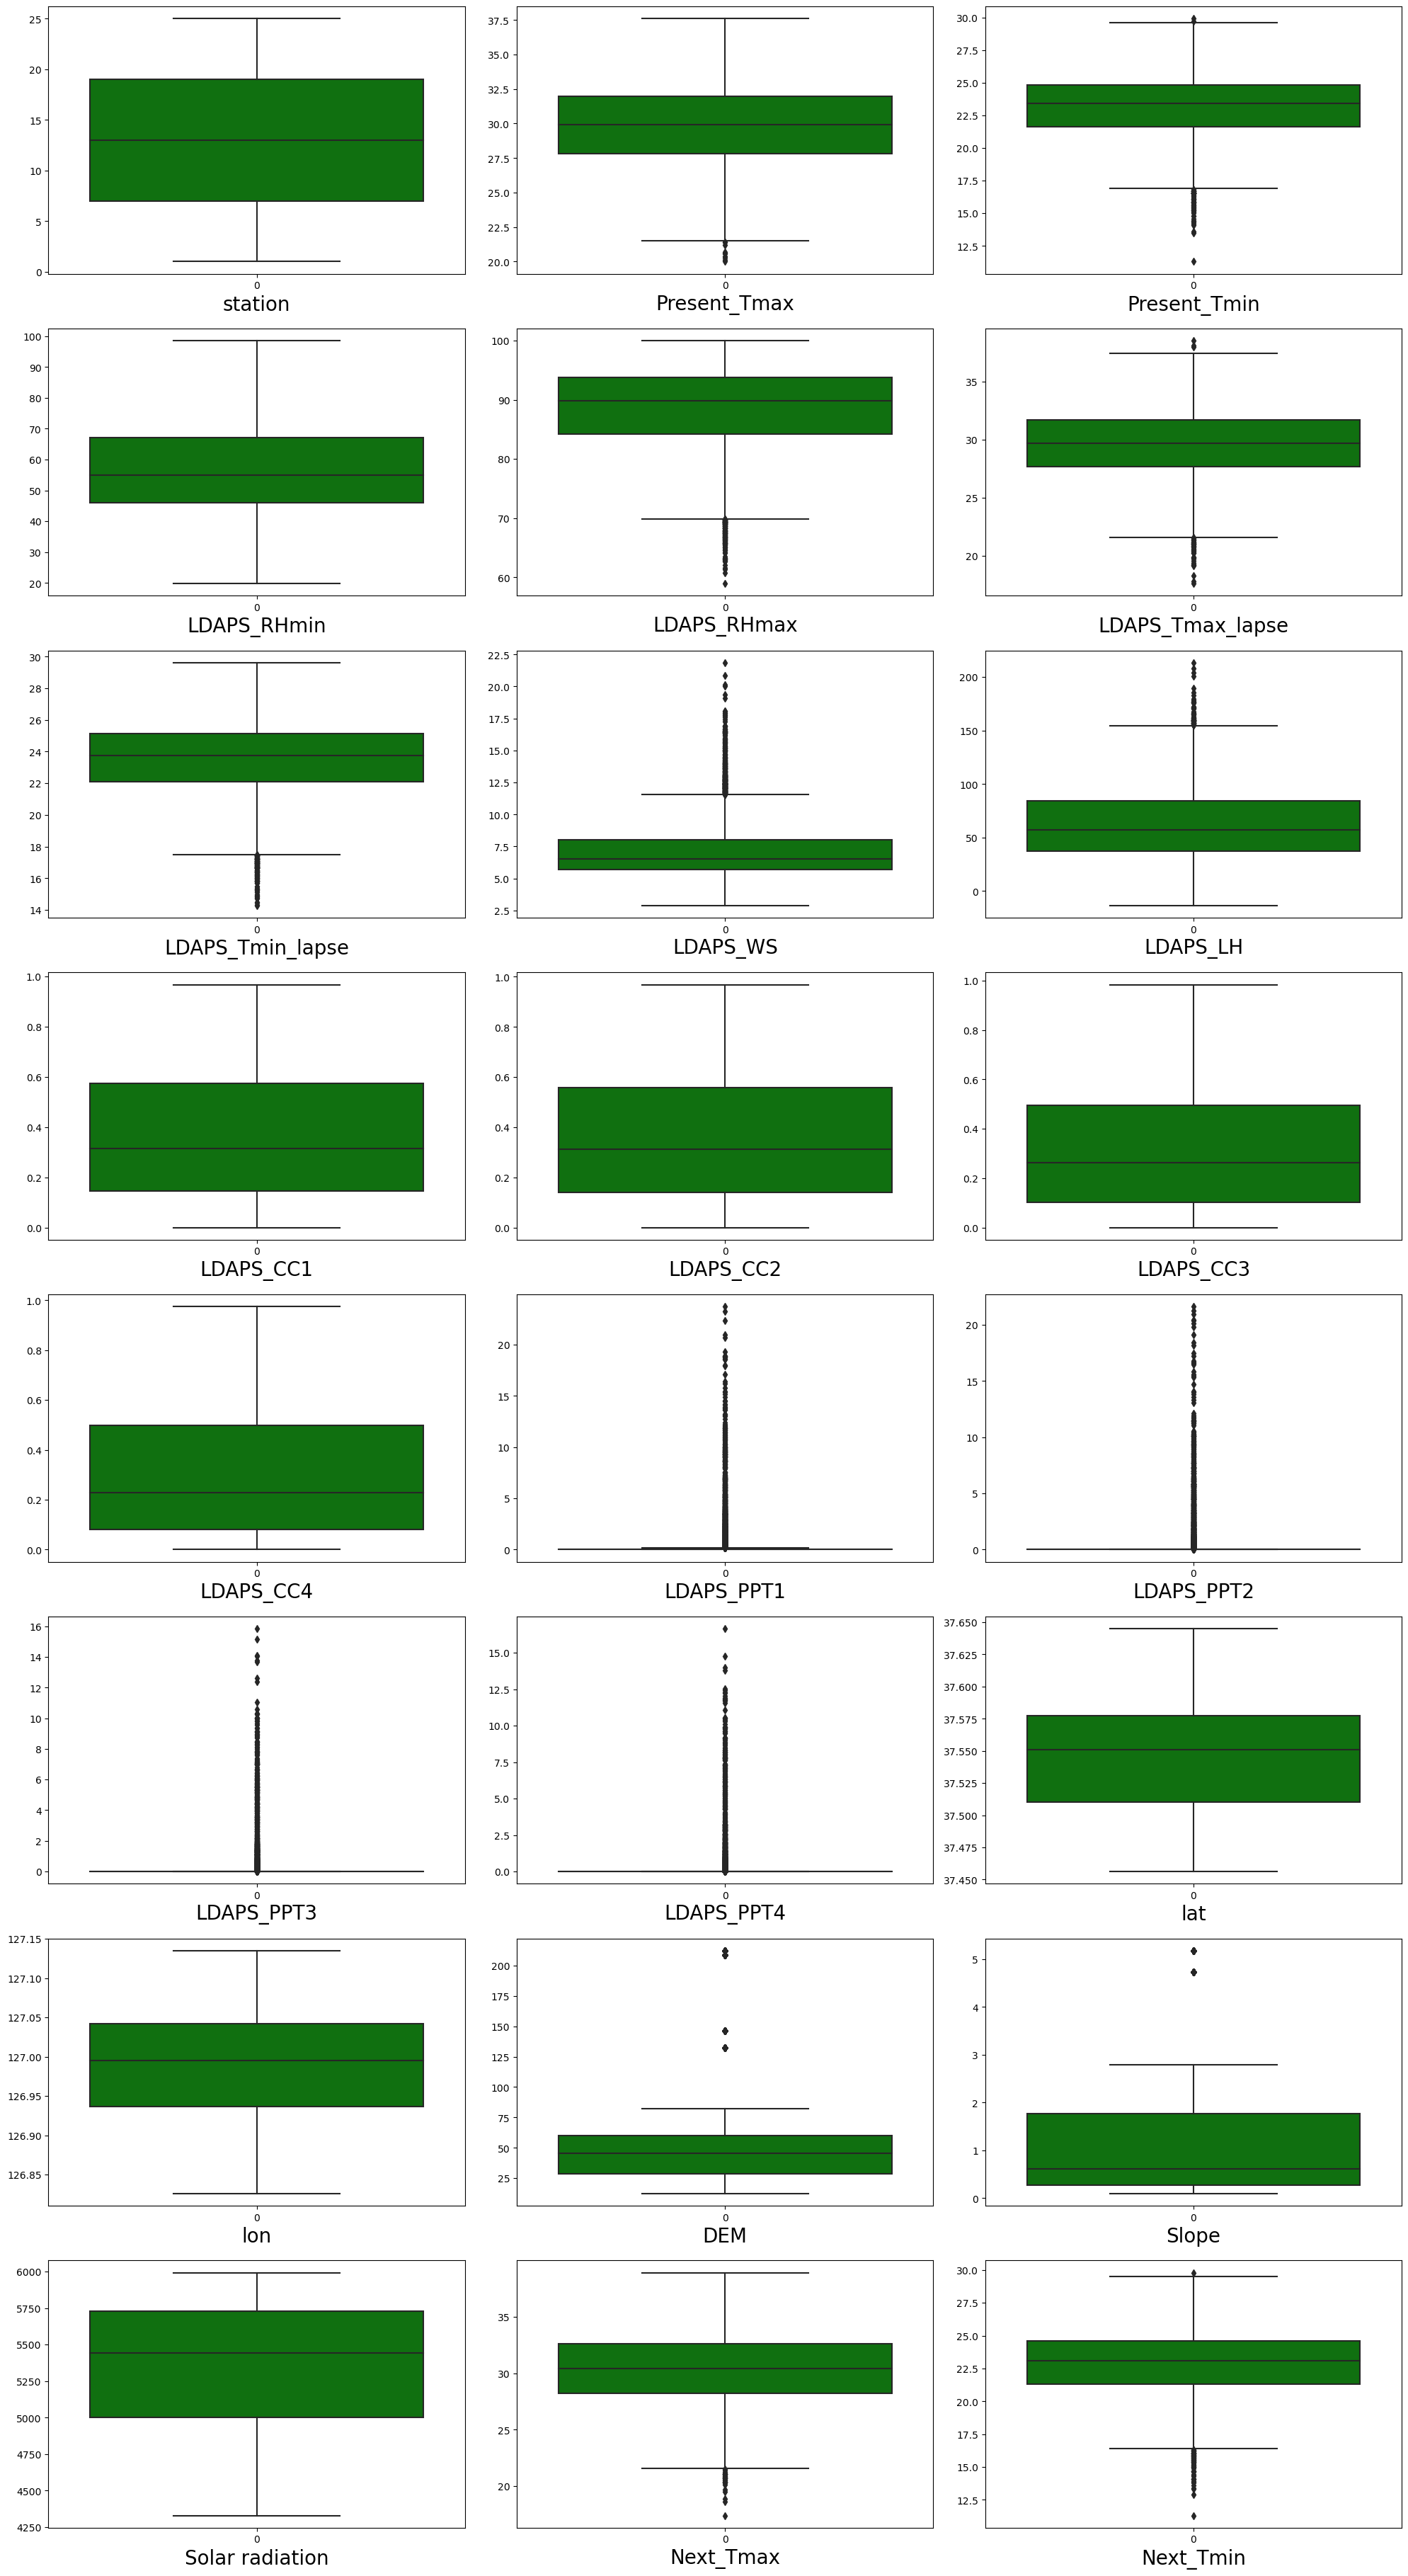

In [41]:
plt.figure(figsize=(20,45),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=29:
        ax=plt.subplot(10,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [42]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers:  (7588, 24)
Shape of the dataframe after removing outliers:  (6739, 24)
Percentage of data loss post outlier removal:  11.188719030047443


# Skewness

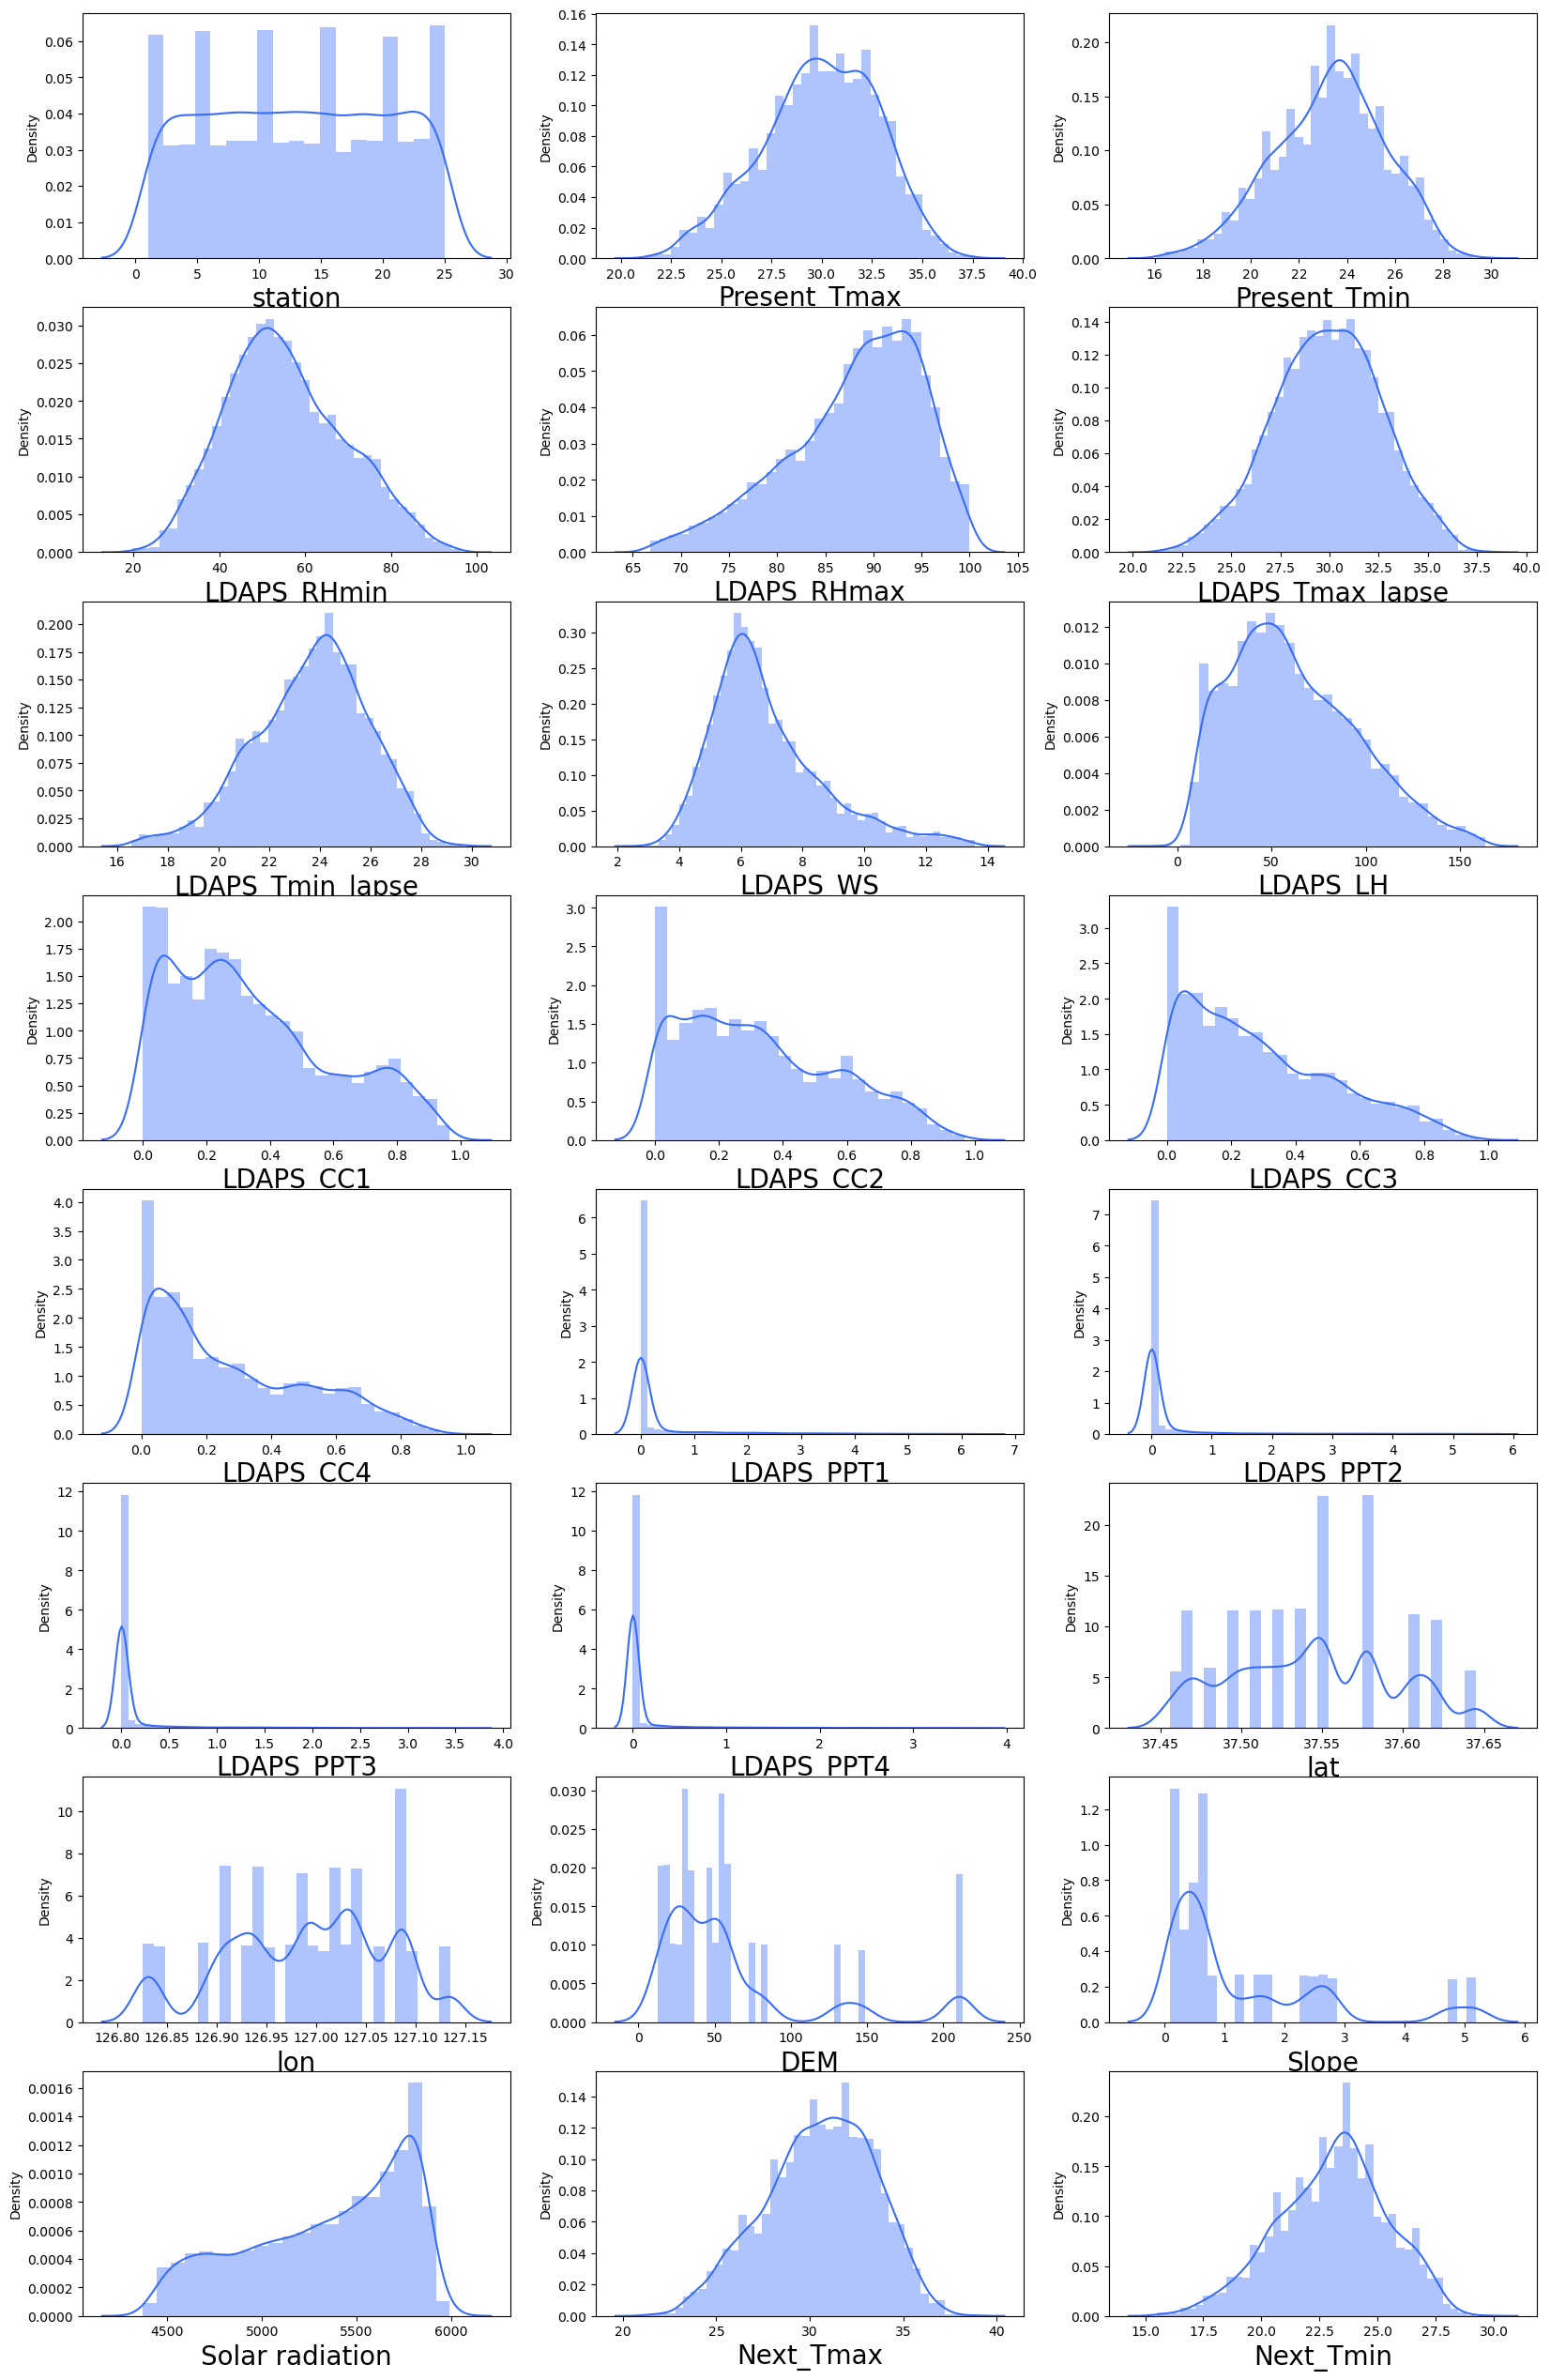

In [43]:
plt.figure(figsize=(20,40),facecolor='white')
sns.set_palette('rainbow')
plotnum=1
for col in df:
    if plotnum<=29:
        plt.subplot(10,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [44]:
df.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
dtype: float64

In [47]:
from scipy.stats import yeojohnson
skew_threshold = 0.5
transformed_columns = []

for column in df.columns:
    if abs(df[column].skew()) > skew_threshold:
        transformed_data, _ = yeojohnson(df[column])
        transformed_columns.append(column)
        df[column] = transformed_data

print("Columns transformed using Yeo-Johnson:", transformed_columns)


Columns transformed using Yeo-Johnson: ['LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4']


# Corrleation

In [48]:
df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.110291,0.133638,-0.069582,-0.182354,0.066863,0.104401,0.030231,-0.135717,0.011902,...,-0.007349,-0.013486,-0.000961,-0.241811,-0.122829,-0.326019,-0.146034,-0.034787,0.106378,0.129110
Present_Tmax,0.110291,1.000000,0.610428,-0.154266,-0.320074,0.540680,0.616886,-0.071596,0.119022,-0.286862,...,-0.106155,-0.039260,-0.030303,-0.052041,0.011132,-0.130892,-0.092409,-0.099696,0.586943,0.615950
Present_Tmin,0.133638,0.610428,1.000000,0.151385,-0.053421,0.441577,0.764258,0.034364,-0.008556,0.104457,...,0.100518,0.030966,-0.063816,-0.072707,-0.043201,-0.238916,-0.157839,-0.047145,0.438813,0.785946
LDAPS_RHmin,-0.069582,-0.154266,0.151385,1.000000,0.566069,-0.555583,0.129481,0.171684,-0.002412,0.580343,...,0.522732,0.436998,0.267426,0.090054,-0.093969,0.057460,0.083910,0.229070,-0.433872,0.134518
LDAPS_RHmax,-0.182354,-0.320074,-0.053421,0.566069,1.000000,-0.403634,-0.163219,0.060965,0.285942,0.415436,...,0.393094,0.240490,0.106696,0.232258,0.013059,0.174176,0.209222,0.154031,-0.323446,-0.110402
LDAPS_Tmax_lapse,0.066863,0.540680,0.441577,-0.555583,-0.403634,1.000000,0.621299,-0.154400,0.005878,-0.404350,...,-0.364438,-0.311127,-0.224395,-0.038285,0.106354,-0.110286,-0.105094,-0.034699,0.816861,0.553227
LDAPS_Tmin_lapse,0.104401,0.616886,0.764258,0.129481,-0.163219,0.621299,1.000000,-0.011333,-0.141554,0.074850,...,0.033097,-0.016950,-0.084973,-0.090587,-0.024177,-0.169881,-0.156322,0.031865,0.546479,0.875382
LDAPS_WS,0.030231,-0.071596,0.034364,0.171684,0.060965,-0.154400,-0.011333,1.000000,-0.056362,0.189345,...,0.176881,0.098503,0.155813,-0.027463,-0.077686,0.113157,0.095385,0.164626,-0.205979,0.023330
LDAPS_LH,-0.135717,0.119022,-0.008556,-0.002412,0.285942,0.005878,-0.141554,-0.056362,1.000000,-0.130020,...,-0.061070,-0.007915,0.003783,0.100486,0.009790,0.053275,0.069892,-0.032027,0.151784,-0.052365
LDAPS_CC1,0.011902,-0.286862,0.104457,0.580343,0.415436,-0.404350,0.074850,0.189345,-0.130020,1.000000,...,0.568332,0.300460,0.214944,-0.014977,-0.016127,-0.031579,-0.034505,0.224341,-0.430392,0.043682


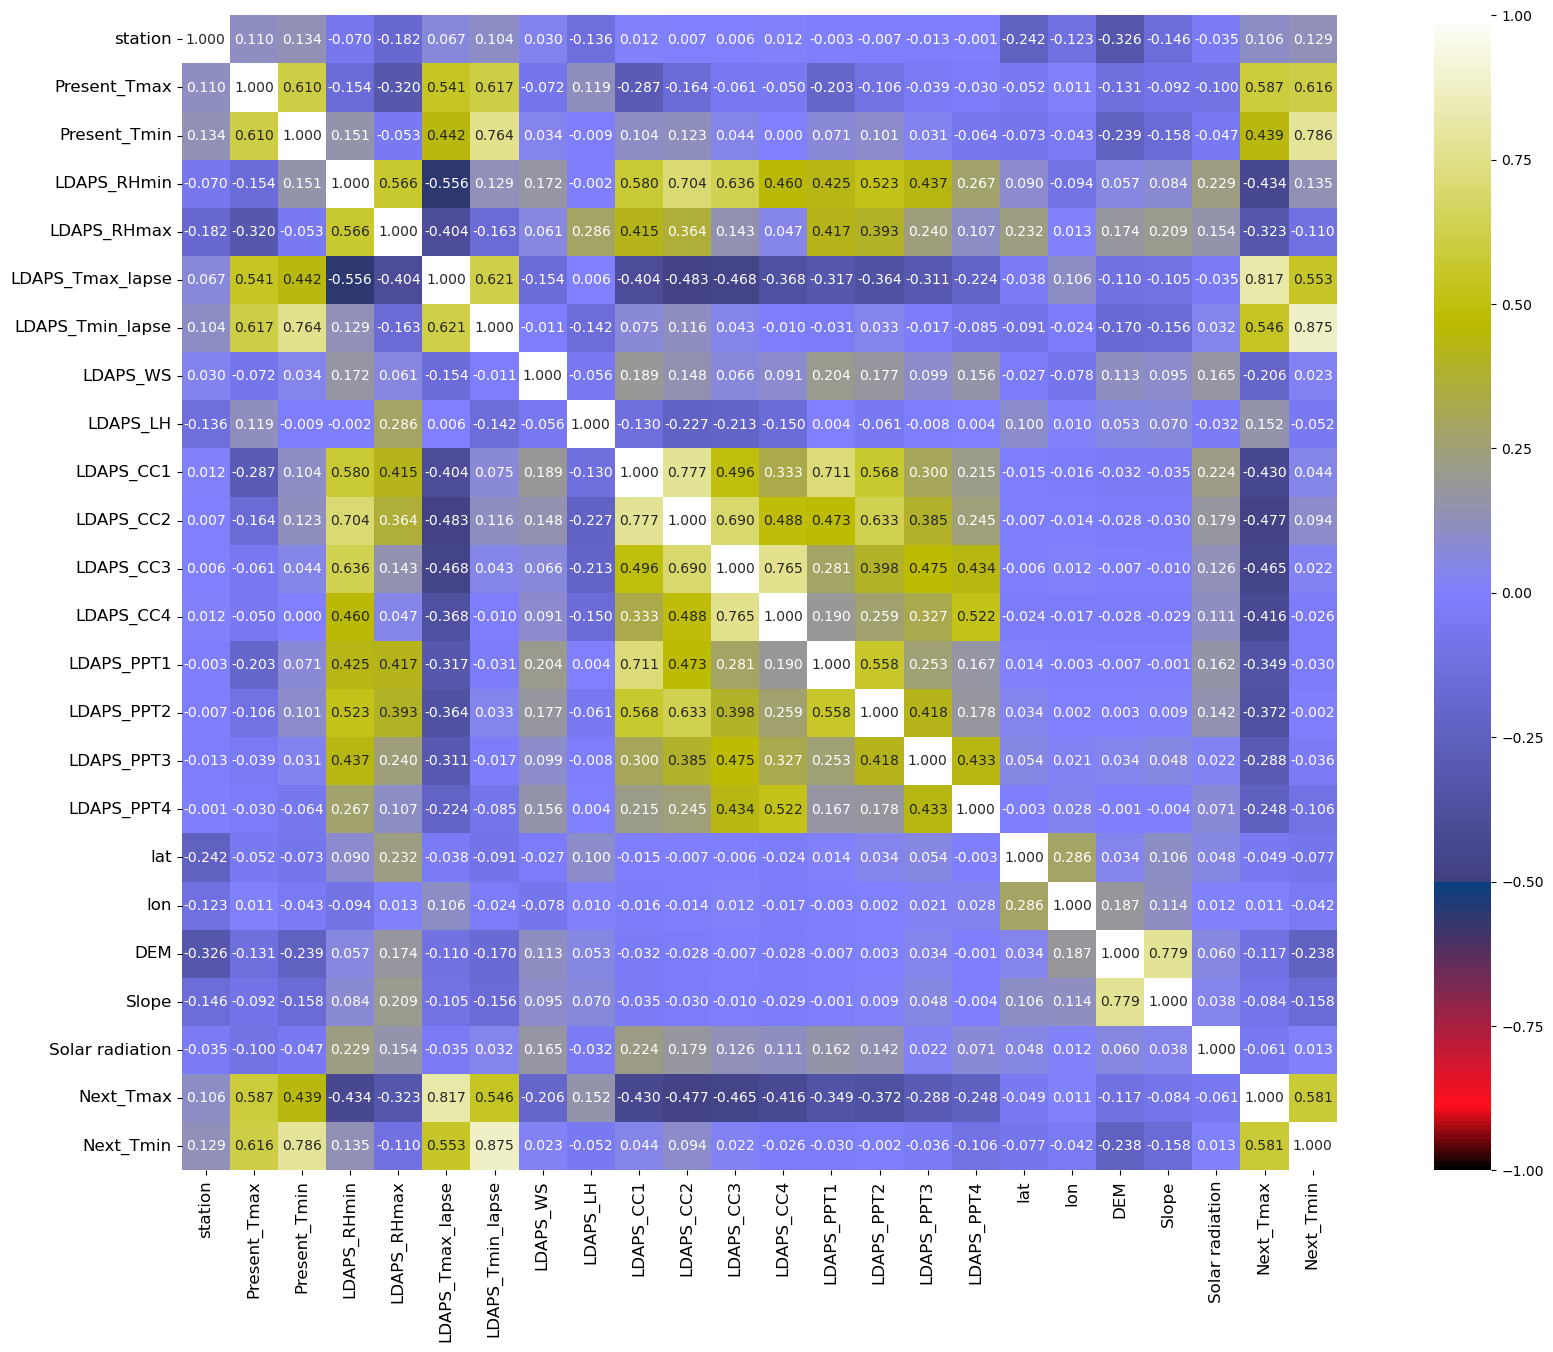

In [49]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

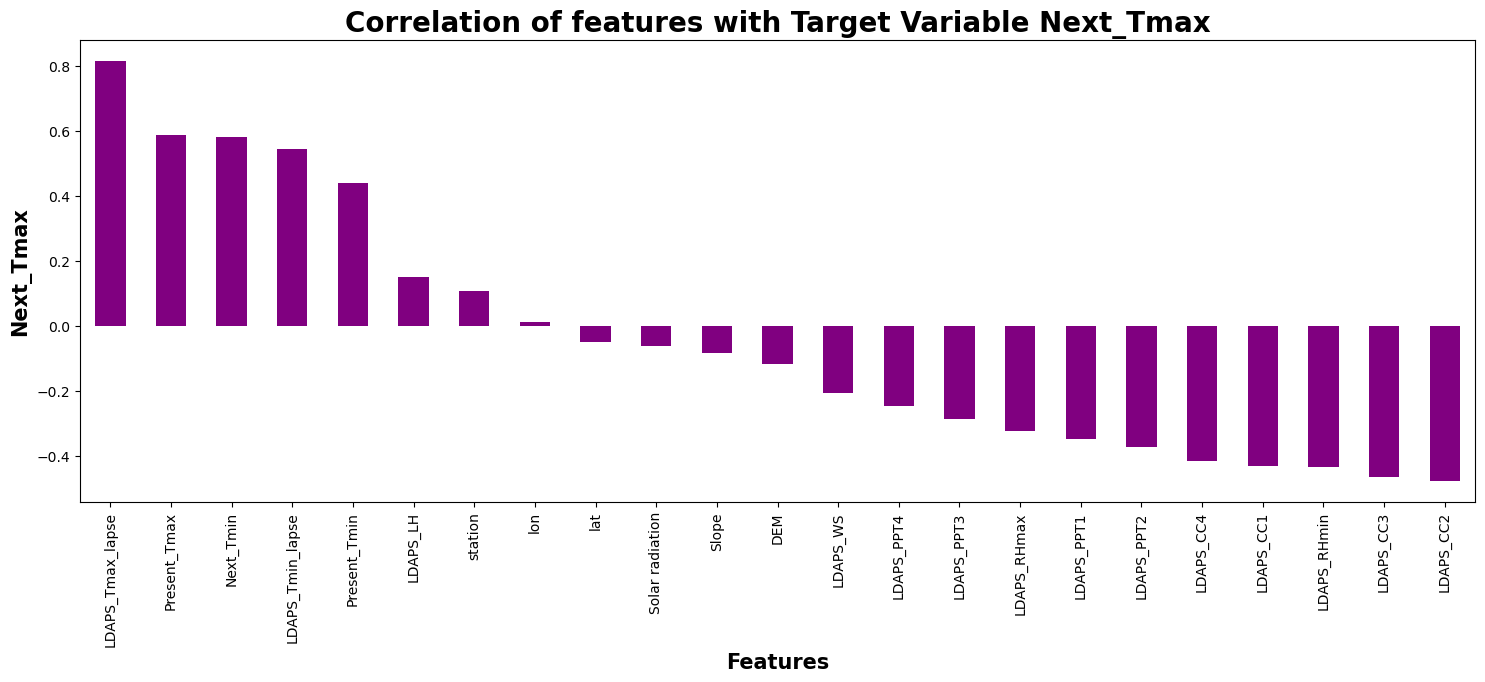

In [50]:
plt.figure(figsize = (18,6))
df.corr()['Next_Tmax'].drop(['Next_Tmax']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Next_Tmax',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Next_Tmax',fontsize = 20,fontweight='bold')
plt.show()

Temperature and cloud cover related feature are moderately or highly correlated with Target Feature.

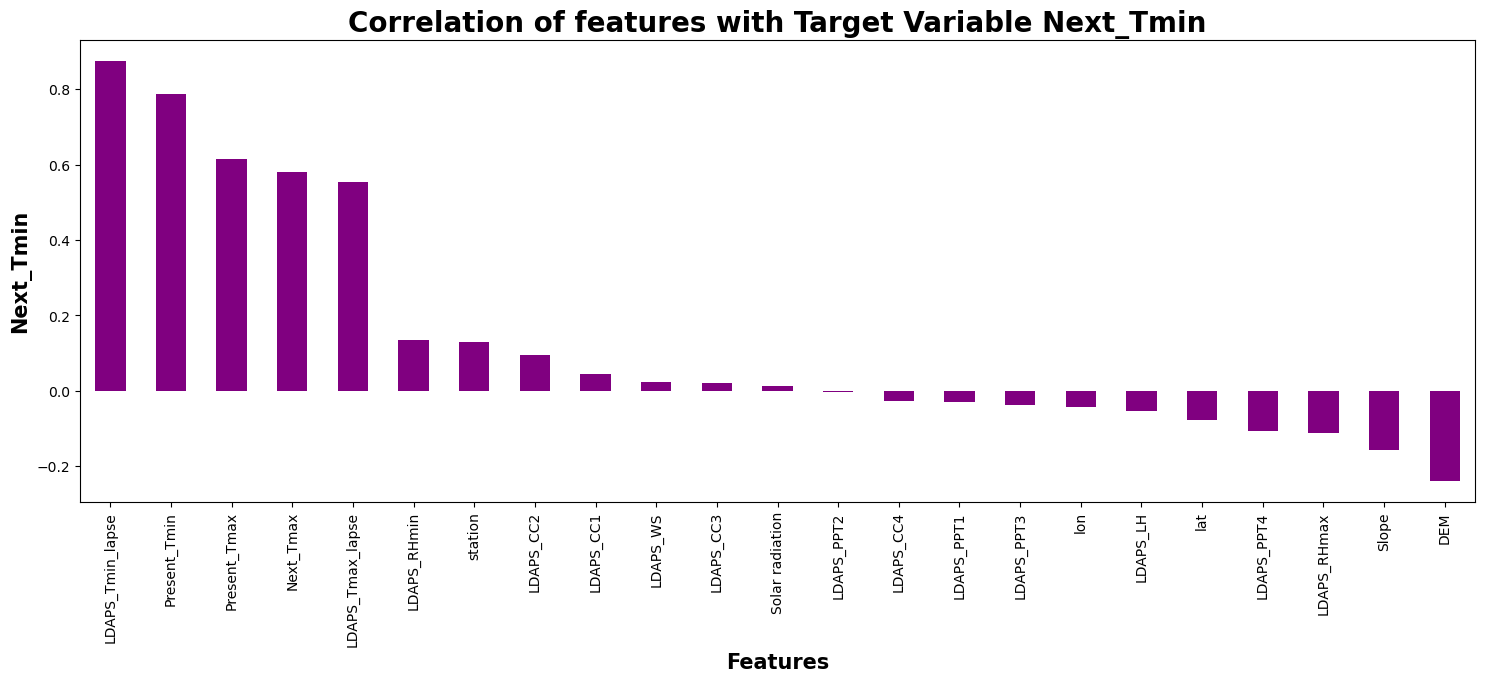

In [51]:
plt.figure(figsize = (18,6))
df.corr()['Next_Tmin'].drop(['Next_Tmin']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Next_Tmin',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Next_Tmin',fontsize = 20,fontweight='bold')
plt.show()

Temperature related feature are moderately or highly correlated with Target Feature.

# Machine Learning Model Building For Next_Tmax

# Standard Scaling

In [52]:
X= df.drop(['Next_Tmax'], axis =1)
Y = df['Next_Tmax']

In [53]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

# Checking Multicollinearity between features using variance_inflation_factor

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,1.290196,station
1,2.799678,Present_Tmax
2,3.305643,Present_Tmin
3,5.989839,LDAPS_RHmin
4,2.511891,LDAPS_RHmax
5,6.782368,LDAPS_Tmax_lapse
6,8.743076,LDAPS_Tmin_lapse
7,1.194756,LDAPS_WS
8,1.482899,LDAPS_LH
9,4.862823,LDAPS_CC1


# PCA

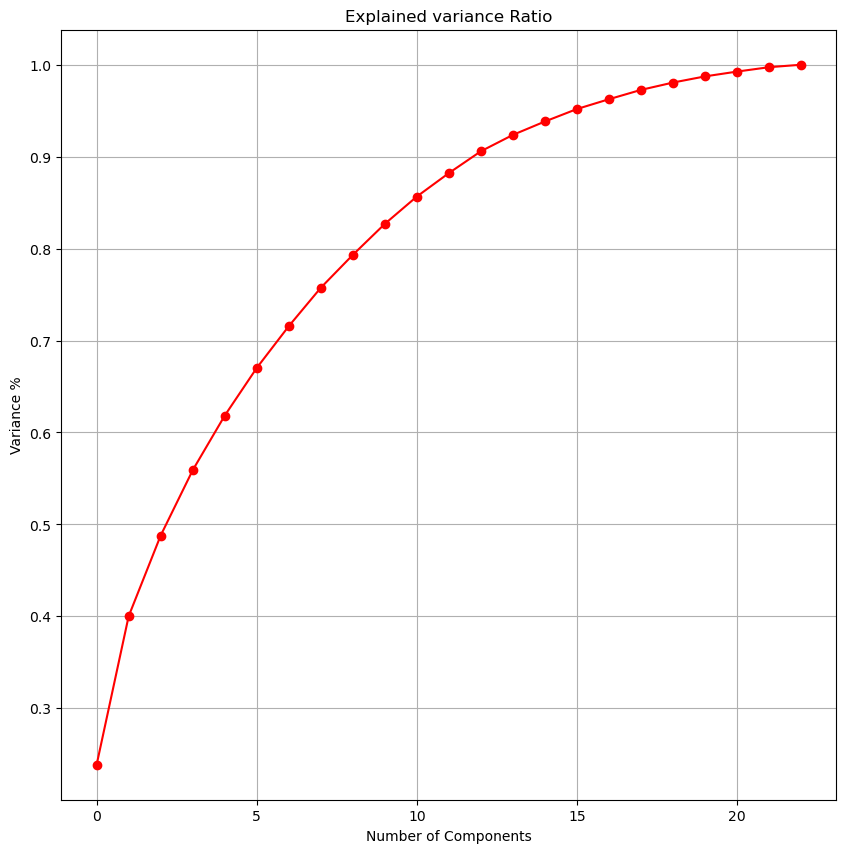

In [55]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

AS per the graph, we can see that 15 principal components attribute for 90% of variation in the data. We shall pick the first 15 components for our prediction.

In [56]:
pca_new = PCA(n_components=15)
x_new = pca_new.fit_transform(X_scale)

In [57]:
principle_x=pd.DataFrame(x_new,columns=np.arange(15))

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (4515, 15)
Training target vector size: (4515,)
Test feature matrix size: (2224, 15)
Test target vector size: (2224,)


# Finding best Random state

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.7994716541276141 on Random_state 108


# Linear Regression Base Model

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=108, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [31.83648034 30.02882141 29.11607467 ... 25.6458775  24.88594211
 32.69184558]


Actual Wins:
 934     32.0
4582    30.1
7277    27.8
4776    27.6
3755    29.8
        ... 
7096    36.7
7148    35.4
7667    28.4
5063    24.0
4239    32.6
Name: Next_Tmax, Length: 2224, dtype: float64


In [62]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 1.021681703735263
Mean squared error : 1.7665473550412991
Root Mean Squared Error: 1.3291152527306649


 R2 Score :
0.7994716541276141


In [63]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.7366048033501783


# Applying other ML Models

In [64]:
from sklearn.ensemble import BaggingRegressor

In [65]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
XT = ExtraTreesRegressor()
BR = BaggingRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
xgb=XGBRegressor()
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('==============================================================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 0.7389860611510791
Mean squared error : 0.9690323008093523
Root Mean Squared Error: 0.9843943827599547


 R2 Score :
0.8900009989408584


 Error of  ExtraTreesRegressor() :
Mean absolute error : 0.6657918165467631
Mean squared error : 0.7746960705935254
Root Mean Squared Error: 0.8801682058524526


 R2 Score :
0.9120609356173615


 Error of  DecisionTreeRegressor() :
Mean absolute error : 1.0817895683453238
Mean squared error : 2.242936151079136
Root Mean Squared Error: 1.4976435327136883


 R2 Score :
0.7453947243532795


 Error of  AdaBoostRegressor() :
Mean absolute error : 1.1668030647527143
Mean squared error : 2.0560401854388486
Root Mean Squared Error: 1.4338898791186332


 R2 Score :
0.7666100847754704


 Error of  GradientBoostingRegressor() :
Mean absolute error : 0.8637400945476593
Mean squared error : 1.2425739658507067
Root Mean Squared Error: 1.1147080182050844


 R2 Score :
0.8589501145921404


 Error of  XGBRe

In [66]:
# Cross Validation
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.6931476157821903


Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.6948091675277144


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.428537704174876


Cross Validation Score : AdaBoostRegressor() :

Mean CV Score : 0.656669954065056


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.7076902327281758


Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_l

# Hyper Parameter Tuning : GridSearchCV

In [78]:
from sklearn.model_selection import GridSearchCV

In [83]:
from sklearn.model_selection import RandomizedSearchCV

parameter = {
    'n_estimators': [200, 300, 400],  # Increase the number of estimators
    'gamma': [0, 0.05, 0.1],  # Fine-tune the gamma parameter
    'booster': ['gbtree', 'dart'],  # Remove gblinear
    'max_depth': [4, 5, 6],  # Add more depth options
    'eta': [0.05, 0.1, 0.2]  # Add more learning rates
}

RSCV = RandomizedSearchCV(XGBRegressor(), parameter, n_iter=10, verbose=10)
RSCV.fit(X_train, Y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START booster=gbtree, eta=0.1, gamma=0.05, max_depth=5, n_estimators=200
[CV 1/5; 1/10] END booster=gbtree, eta=0.1, gamma=0.05, max_depth=5, n_estimators=200;, score=0.906 total time=   0.2s
[CV 2/5; 1/10] START booster=gbtree, eta=0.1, gamma=0.05, max_depth=5, n_estimators=200
[CV 2/5; 1/10] END booster=gbtree, eta=0.1, gamma=0.05, max_depth=5, n_estimators=200;, score=0.891 total time=   0.2s
[CV 3/5; 1/10] START booster=gbtree, eta=0.1, gamma=0.05, max_depth=5, n_estimators=200
[CV 3/5; 1/10] END booster=gbtree, eta=0.1, gamma=0.05, max_depth=5, n_estimators=200;, score=0.900 total time=   0.2s
[CV 4/5; 1/10] START booster=gbtree, eta=0.1, gamma=0.05, max_depth=5, n_estimators=200
[CV 4/5; 1/10] END booster=gbtree, eta=0.1, gamma=0.05, max_depth=5, n_estimators=200;, score=0.891 total time=   0.2s
[CV 5/5; 1/10] START booster=gbtree, eta=0.1, gamma=0.05, max_depth=5, n_estimators=200
[CV 5/5; 1/10] END boos

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   param_distributions={'booster': ['gbtree', 'dart'],
                                        'eta': [0.05, 0.1, 0.2],
                                        'gamma': [0, 0.05, 0.1],
                                        'max_depth': [4, 5, 6],
                                        'n_estimators': [200, 300, 400]},
                   verbose=10)

In [84]:
RSCV.best_params_

{'n_estimators': 400,
 'max_depth': 5,
 'gamma': 0,
 'eta': 0.2,
 'booster': 'gbtree'}

# Final Regression Model

In [85]:
Final_mod =  XGBRegressor(n_estimators=100 , booster= 'dart', eta= 0.1, max_depth= 10, gamma= 0.0 )
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.7001015568808685
Mean squared error : 0.8885362398807299
Root Mean Squared Error: 0.942622002650442


 R2 Score of Final Model :
0.899138451102101




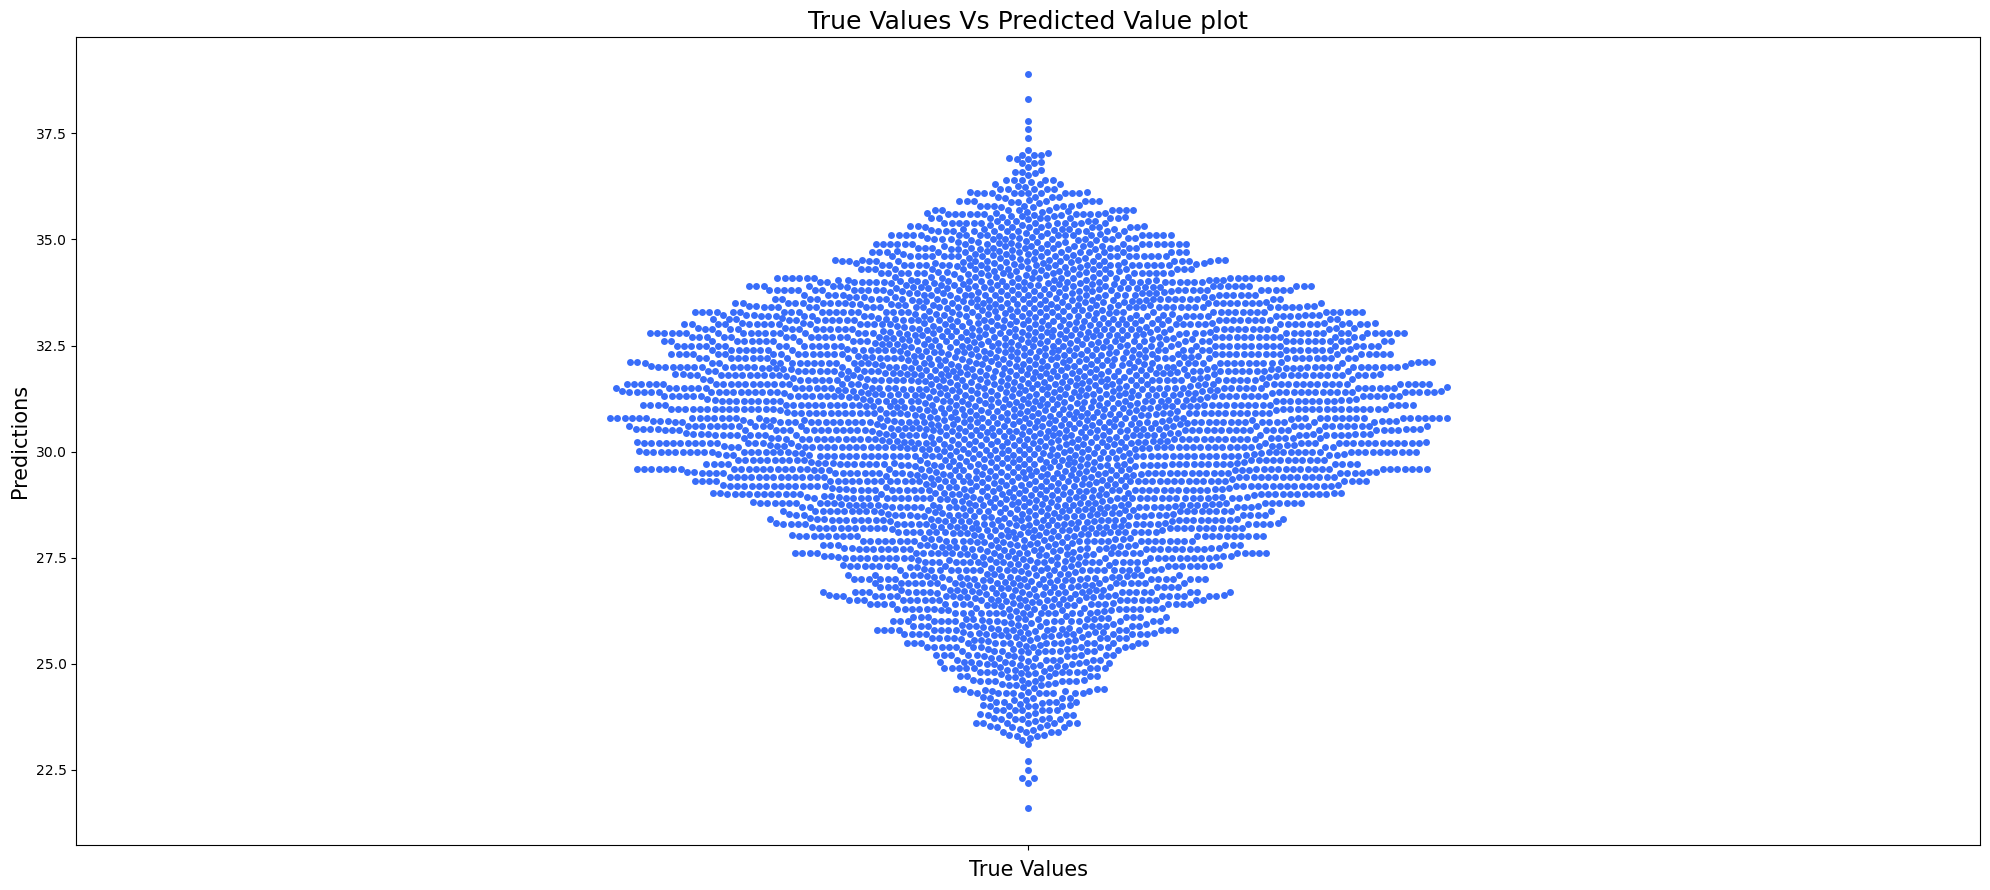

In [87]:
plt.figure(figsize=(20, 9))
combined_values = np.concatenate([Y_test.round(2), y_pred])
sns.swarmplot(combined_values)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('True Values Vs Predicted Value plot', fontsize=18)
plt.tight_layout()
plt.show()


In [88]:
import joblib
joblib.dump(Final_mod,'Next_Tmax_Forecast_Final.pkl')

['Next_Tmax_Forecast_Final.pkl']

# Prediction According Final Regression Model

In [89]:
# Loading the saved model
Model = joblib.load("Next_Tmax_Forecast_Final.pkl")

# prediction  DataFrame
actual = np.array(Y_test)
predicted = np.array(Model.predict(X_test))
df_Predicted = pd.DataFrame({"Actual Values":actual,"Predicted Values":predicted},index= range(len(actual)))
df_Predicted 

,Actual Values,Predicted Values
0,32.0,31.407375
1,30.1,29.801008
2,27.8,28.479555
3,27.6,26.811073
4,29.8,30.009481
...,...,...
2219,36.7,36.644943
2220,35.4,34.621567
2221,28.4,27.731512
2222,24.0,24.329796


# Machine Learning Model Building For Next_Tmin

Standard Scaling

In [90]:
X = df.drop(['Next_Tmin'], axis =1)
Y = df['Next_Tmin']

In [91]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (4515, 23)
Training target vector size: (4515,)
Test feature matrix size: (2224, 23)
Test target vector size: (2224,)


# Finding best Random state

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.8512117483412615 on Random_state 176


# Linear Regression Base Model

In [94]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=43, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [23.45958782 24.9119336  23.31524707 ... 22.48887448 26.20649263
 25.38773005]


Actual Wins:
 5006    23.0
947     25.6
3726    23.0
715     22.1
4242    24.0
        ... 
4097    24.6
3186    17.1
6641    23.1
3854    26.2
1190    25.7
Name: Next_Tmin, Length: 2224, dtype: float64


# Linear Regression Evaluation Matrix

In [95]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 0.7360651547963469
Mean squared error : 0.859349049882008
Root Mean Squared Error: 0.9270108143285104


 R2 Score :
0.8509398580896197


In [96]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.792152207464987


# Applying other ML Models

In [97]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
XT = ExtraTreesRegressor()
BR = BaggingRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
xgb=XGBRegressor()
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('==============================================================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 0.5590026978417266
Mean squared error : 0.5338367868705035
Root Mean Squared Error: 0.7306413531073255


 R2 Score :
0.9074022514846273


 Error of  ExtraTreesRegressor() :
Mean absolute error : 0.5343498201438848
Mean squared error : 0.4900835764388489
Root Mean Squared Error: 0.7000596949109761


 R2 Score :
0.9149915538255942


 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.8199640287769784
Mean squared error : 1.2038129496402878
Root Mean Squared Error: 1.0971841001583498


 R2 Score :
0.7911901698947912


 Error of  AdaBoostRegressor() :
Mean absolute error : 0.8399943005243244
Mean squared error : 1.0728346916802023
Root Mean Squared Error: 1.0357773369215038


 R2 Score :
0.8139092707320883


 Error of  GradientBoostingRegressor() :
Mean absolute error : 0.6051790914961276
Mean squared error : 0.5927468077802479
Root Mean Squared Error: 0.7699005181062343


 R2 Score :
0.8971838936730306


 Error of  XGBR

In [98]:
# Cross Validation
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.7945419114462025


Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.7982251014292066


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.6146489973621262


Cross Validation Score : AdaBoostRegressor() :

Mean CV Score : 0.7461232804311182


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.8048221010911218


Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max

# Hyper Parameter Tuning : GridSearchCV

In [99]:
from sklearn.model_selection import GridSearchCV
parameter = {'n_estimators':[50,75,100],'gamma':np.arange(0,0.2,0.1),
              'booster' : ['gbtree','dart','gblinear'], 'max_depth':[4,6,8,10],
              'eta' : [0.001, 0.01, 0.1] }

In [100]:
GCV = GridSearchCV(XGBRegressor(),parameter,verbose =10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 1/5; 1/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 1/5; 1/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=0.075 total time=   0.0s
[CV 2/5; 1/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 2/5; 1/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=0.072 total time=   0.0s
[CV 3/5; 1/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 3/5; 1/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=0.072 total time=   0.0s
[CV 4/5; 1/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 4/5; 1/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=0.071 total time=   0.0s
[CV 5/5; 1/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 5/5; 1/

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'booster': ['gbtree', 'dart', 'gblinear'],
                         'eta': [0.001, 0.01, 0.1], 'gamma': array([0. , 0.1]),
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [50, 75, 100]},
             verbose=10)

In [101]:
GCV.best_params_

{'booster': 'gbtree',
 'eta': 0.1,
 'gamma': 0.1,
 'max_depth': 6,
 'n_estimators': 100}

# Final Regression Model For Next_Tmin

In [102]:
Final_mod =  XGBRegressor(n_estimators=100 , booster= 'dart', eta= 0.1, max_depth= 8, gamma= 0.0 )
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.48974611347527813
Mean squared error : 0.4245672424571371
Root Mean Squared Error: 0.6515882461011226


 R2 Score of Final Model :
0.9263558231432861




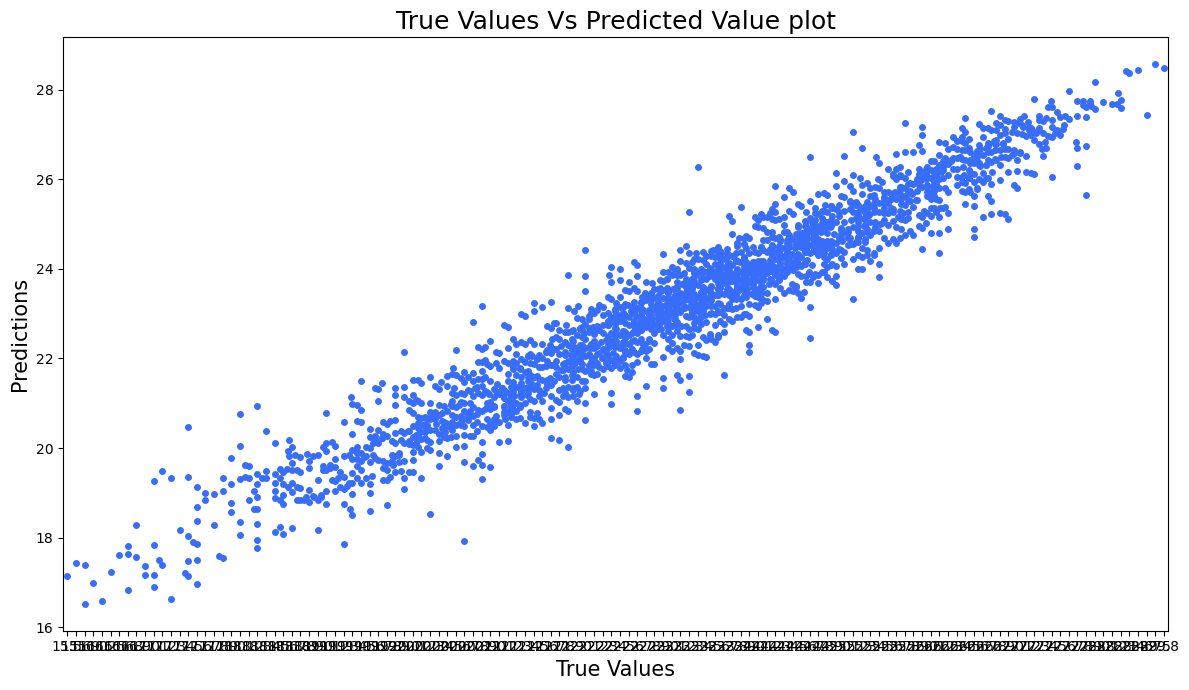

In [104]:
plt.figure(figsize=(12, 7))
sns.swarmplot(x=Y_test.round(2), y=y_pred)
plt.title('True Values Vs Predicted Value plot', fontsize=18)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()
plt.show()



# Saving Final Regression Model For Next_Tmin

In [105]:
import joblib
joblib.dump(Final_mod,'Next_Tmin_Forecast_Final.pkl')

['Next_Tmin_Forecast_Final.pkl']

# Prediction According Final Regression Model For Next_Tmin

In [106]:
Model = joblib.load("Next_Tmin_Forecast_Final.pkl")

# prediction  DataFrame
actual = np.array(Y_test)
predicted = np.array(Model.predict(X_test))
df_Predicted = pd.DataFrame({"Actual Values":actual,"Predicted Values":predicted},index= range(len(actual)))
df_Predicted 

,Actual Values,Predicted Values
0,23.0,23.726006
1,25.6,25.554573
2,23.0,22.913500
3,22.1,22.937288
4,24.0,23.918602
...,...,...
2219,24.6,24.092312
2220,17.1,17.167799
2221,23.1,23.151276
2222,26.2,26.201725
